In [1]:
import pandas as pd
import json
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib import pyplot as plt

with open("owid-covid-data.json", 'r') as file:
    covid_data = json.load(file)

# Data frame creation

In [2]:
TimeSeries_df = pd.DataFrame(columns = ['date', 'code', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'total_cases_per_million', 'new_cases_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_cases_smoothed', 'new_deaths_smoothed',
       'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million'])

TimeSeries_df = TimeSeries_df.set_index(['code', 'date'])

In [3]:
CountryWise_df = pd.DataFrame(columns = ['code', 'continent', 'location', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index'])
CountryWise_df = CountryWise_df.set_index('code')

In [4]:
for k, v in covid_data.items():
    data_copy = v['data']
#   Preparing time series dataframe
    X = pd.DataFrame.from_dict(v['data'])
    X['code'] = [k]*len(X)
    X = X.set_index(['code', 'date'])
    TimeSeries_df = TimeSeries_df.append(X, verify_integrity=True)
    
#   Preparing normal country wise dataframe
    del data_copy
    Y = pd.Series(v, name = k)
    CountryWise_df = CountryWise_df.append(Y)

In [5]:
TimeSeries_df

total_cases  new_cases  total_deaths  new_deaths  \
code     date                                                           
AFG      2019-12-31          0.0        0.0           0.0         0.0   
         2020-01-01          0.0        0.0           0.0         0.0   
         2020-01-02          0.0        0.0           0.0         0.0   
         2020-01-03          0.0        0.0           0.0         0.0   
         2020-01-04          0.0        0.0           0.0         0.0   
...                          ...        ...           ...         ...   
OWID_WRL 2020-10-09   36611917.0   387973.0     1063243.0      9118.0   
         2020-10-10   36956458.0   344541.0     1068963.0      5720.0   
         2020-10-11   37296383.0   339925.0     1073683.0      4720.0   
         2020-10-12   37602785.0   306402.0     1077720.0      4037.0   
         2020-10-13   37875422.0   272637.0     1081632.0      3912.0   

                     total_cases_per_million  new_cases_per_million  \
code     date                                                         
AFG      2019-12-31                    0.000                  0.000   
         2020-01-01                    0.000                  0.000   
         2020-01-02                    0.000                  0.000   
         2020-01-03                    0.000                  0.000   
         2020-01-04                    0.000                  0.000   
...                                      ...                    ...   
OWID_WRL 2020-10-09                 4696.968                 49.773   
         2020-10-10                 4741.169                 44.201   
         2020-10-11                 4784.778                 43.609   
         2020-10-12                 4824.087                 39.309   
         2020-10-13                 4859.064                 34.977   

                     total_deaths_per_million  new_deaths_per_million  \
code     date                                                           
AFG      2019-12-31                     0.000                   0.000   
         2020-01-01                     0.000                   0.000   
         2020-01-02                     0.000                   0.000   
         2020-01-03                     0.000                   0.000   
         2020-01-04                     0.000                   0.000   
...                                       ...                     ...   
OWID_WRL 2020-10-09                   136.404                   1.170   
         2020-10-10                   137.138                   0.734   
         2020-10-11                   137.744                   0.606   
         2020-10-12                   138.261                   0.518   
         2020-10-13                   138.763                   0.502   

                     new_cases_smoothed  new_deaths_smoothed  ...  \
code     date                                                 ...   
AFG      2019-12-31                 NaN                  NaN  ...   
         2020-01-01                 NaN                  NaN  ...   
         2020-01-02                 NaN                  NaN  ...   
         2020-01-03                 NaN                  NaN  ...   
         2020-01-04                 NaN                  NaN  ...   
...                                 ...                  ...  ...   
OWID_WRL 2020-10-09          320160.286             5606.714  ...   
         2020-10-10          323840.714             5633.286  ...   
         2020-10-11          328909.571             5633.143  ...   
         2020-10-12          332232.000             5643.429  ...   
         2020-10-13          332831.571             5566.143  ...   

                     stringency_index  new_tests  total_tests  \
code     date                                                   
AFG      2019-12-31               NaN        NaN          NaN   
         2020-01-01               0.0        NaN          NaN   
         2020-01-02               0.0  

In [6]:
CountryWise_df

,continent,location,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,data,extreme_poverty,female_smokers,male_smokers
code,,,,,,,,,,,,,,,,,,
AFG,Asia,Afghanistan,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.500,64.83,0.498,"[{'date': '2019-12-31', 'total_cases': 0.0, 'n...",NaN,NaN,NaN
ALB,Europe,Albania,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,304.195,10.08,NaN,2.890,78.57,0.785,"[{'date': '2020-03-09', 'total_cases': 2.0, 'n...",1.1,7.100,51.200
DZA,Africa,Algeria,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,278.364,6.73,83.741,1.900,76.88,0.754,"[{'date': '2019-12-31', 'total_cases': 0.0, 'n...",0.5,0.700,30.400
AND,Europe,Andorra,7.726500e+04,163.755,NaN,NaN,NaN,NaN,109.135,7.97,NaN,NaN,83.73,0.858,"[{'date': '2020-03-03', 'total_cases': 1.0, 'n...",NaN,29.000,37.800
AGO,Africa,Angola,3.286627e+07,23.890,16.8,2.405,1.362,5819.495,276.045,3.94,26.664,NaN,61.15,0.581,"[{'date': '2020-03-22', 'total_cases': 2.0, 'n...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ESH,Africa,Western Sahara,5.973300e+05,NaN,28.4,NaN,1.380,NaN,NaN,NaN,NaN,NaN,70.26,NaN,"[{'date': '2020-04-26', 'total_cases': 6.0, 'n...",NaN,NaN,NaN
YEM,Asia,Yemen,2.982597e+07,53.508,20.3,2.922,1.583,1479.147,495.003,5.35,49.542,0.700,66.12,0.452,"[{'date': '2020-04-10', 'total_cases': 1.0, 'n...",18.8,7.600,29.200
ZMB,Africa,Zambia,1.838396e+07,22.995,17.7,2.480,1.542,3689.251,234.499,3.94,13.938,2.000,63.89,0.588,"[{'date': '2020-03-19', 'total_cases': 2.0, 'n...",57.5,3.100,24.700


# Visualization

In [7]:
# Finding total cases, total tests and total deaths continent wise
continent_grouped = TimeSeries_df.merge(CountryWise_df['continent'],
                                        how='inner',left_on='code', 
                                        left_index=True, right_index=True)[['new_cases', 'new_deaths', 'new_tests', 'continent']].groupby('continent').sum()


# continent population
continent_group_pop = CountryWise_df.groupby('continent')['population'].sum()

In [8]:
continent_names_list = list(continent_group_pop.index)
continent_pop_list = list(continent_group_pop)
continent_death_list = list(continent_grouped['new_deaths'])
continent_cases_list = list(continent_grouped['new_cases'])
continent_tested_list = list(continent_grouped['new_tests'])

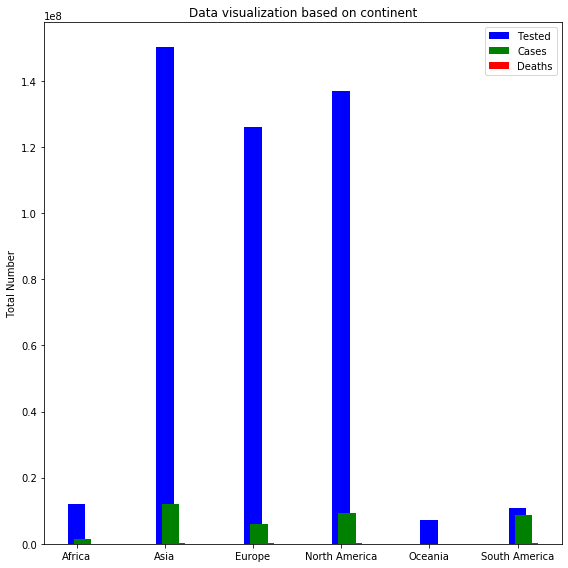

In [9]:
x = np.arange(len(continent_names_list))  # the label locations
width = 0.2

fig, ax = plt.subplots(figsize=(8, 8))
rects1 = ax.bar(x, continent_tested_list, width, label='Tested', color='b')
rects2 = ax.bar(x + width/3, continent_cases_list, width, label='Cases', color='g')
rects3 = ax.bar(x + 2*width/3, continent_death_list, width, label='Deaths', color='r')

ax.set_ylabel('Total Number')
ax.set_title('Data visualization based on continent')
ax.set_xticks(x)
ax.set_xticklabels(continent_names_list)
ax.legend()

fig.tight_layout()
plt.show()

# Preprocessing

In [10]:
# target class
total_cases_Y = TimeSeries_df.groupby('code')['new_cases'].sum()

In [11]:
total_cases_Y.shape

(211,)

In [12]:
# X = feature set for training

CountryWise_df.dtypes
X = CountryWise_df.drop(['continent', 'location', 'data'], axis=1)

In [13]:
# finding correlated features to remove them
correlation = []

for index, rows in X.corr().iterrows():
    cor_dict = {index: []}
    for i, v in rows.iteritems():
        if(not index==i):
            if(abs(v)>=0.8):
                cor_dict[index].append(i)
                
        
    correlation.append(cor_dict)

In [14]:
# median_age has high correlation with 'aged_65_older', 'aged_70_older', 'life_expectancy' and handwashing with 'human_development_index'

X.drop(['aged_65_older', 'aged_70_older', 'life_expectancy', 'human_development_index'], axis=1, inplace=True)

In [15]:
# filling missing values using median
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

In [16]:
X_t = imp_median.fit_transform(X)

In [17]:
scaler = StandardScaler()
X_tt = scaler.fit_transform(X_t)

In [18]:
X_tt.shape

(211, 11)

# Model training

In [19]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X_tt, total_cases_Y, test_size=0.2, random_state=1)

In [20]:
reg = linear_model.Lasso()
grdSearch = GridSearchCV(reg, param_grid={'alpha': np.linspace(0, 1, num=20)}, cv=3, verbose=1)

grdSearch.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20504032086310.754, tolerance: 5406597230.061968
  positive)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: UserWarn

GridSearchCV(cv=3, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [21]:
grdSearch.best_estimator_.score(X_train, y_train)

0.17399478217151654

In [22]:
grdSearch.best_params_

{'alpha': 1.0}

In [23]:
# # to remove features highly correlated

# high_correlated_with_total_cases = []
# for feature, corr in TimeSeries_df.corr()['total_cases'].iteritems():
#     if((not feature=='total_cases') and corr>=0.85):
#         high_correlated_with_total_cases.append(feature)
        
# TimeSeries_df.drop(high_correlated_with_total_cases, axis=1, inplace=True)

# # drop records having any Nan values
# TimeSeries_df.dropna(how='any', inplace=True)

# # checking the type of fields in the dataframe
# TimeSeries_df.dtypes

# # drop non-numeric field
# TimeSeries_df.drop('tests_units', axis=1, inplace=True)